# Getting started with Pema

2/11/2021 

j.angevaare@nikhef.nl

## Basic examples of how to use pema easily
below we will explain
 - how to run pema
 - What types of outputs we can get to match peaks and events
 
## Starting a context
Just as in `wfsim` or `straxen` we need a context. In this example, we use a context from `straxen` but `pema` also has it's own context if you want to have some more expert experience of of the fine details of the package 

In [1]:
import pema
import straxen
import wfsim
import pandas as pd
import logging
import matplotlib.pyplot as plt
import numpy as np

# WFSim can be quite verboose, let's increase the loggers verbosity
logging.getLogger().setLevel(logging.ERROR)

In [2]:
straxen.print_versions('strax straxen wfsim pema'.split())

Working on midway2-0462.rcc.local with the following versions and installation paths:
python	v3.8.5	(default, Sep  4 2020, 07:30:14) [GCC 7.3.0]
strax	v1.1.1	/home/angevaare/software/strax/strax	git branch:master | 1f4d22e
straxen	v1.1.2	/home/angevaare/software/Miniconda3/envs/strax/lib/python3.8/site-packages/straxen
wfsim	v0.5.9	/home/angevaare/software/Miniconda3/envs/strax/lib/python3.8/site-packages/wfsim
pema	v0.3.0	/home/angevaare/software/pema/pema	git branch:overlap_window | 9fbe0bd


In [3]:
st = straxen.contexts.xenonnt_simulation??

In [ ]:
st = straxen.contexts.xenonnt_simulation

In [4]:
st = straxen.contexts.xenonnt_simulation

In [5]:
st = straxen.contexts.xenonnt_simulation

In [6]:
run_id = '026000'
st = straxen.contexts.xenonnt_simulation(cmt_run_id_sim=run_id)

## Write some instruction file for WFSim
This is just to make a CSV file with ~100 events so that we don't simulate for a long time

In [7]:
instructions = dict(
    event_rate=50,
    chunk_size=1,
    n_chunk=2,
    tpc_radius=straxen.tpc_r,
    tpc_length=straxen.tpc_z,
    drift_field=10,
    energy_range=[1, 10],  # keV
    nest_inst_types=wfsim.NestId.ER,
)
instructions_path = './inst.csv'

In [8]:
# Write these instructions to the instructions_path
pema.inst_to_csv(
            instructions_path,
            get_inst_from=pema.rand_instructions,
            **instructions)

generating instructions from nest:   0%|          | 0/100 [00:00<?, ?it/s]

/home/angevaare/software/pema/pema/wfsim_utils.py:97: UserWarning: g4id is not (fully) filled
  warn(f'{field} is not (fully) filled')
/home/angevaare/software/pema/pema/wfsim_utils.py:97: UserWarning: vol_id is not (fully) filled
  warn(f'{field} is not (fully) filled')


if we now look at the instructions, we see that the instructions are in the format WFSim needs

In [9]:
pd.read_csv(instructions_path).head(5)

,event_number,type,time,x,y,z,amp,recoil,e_dep,g4id,vol_id,local_field,n_excitons
0,0,1,10000000,13.431852,-50.694030,-48.530840,352,11,3.149349,-1,-1,10.0,12
1,0,2,10000000,13.431852,-50.694030,-48.530840,394,11,3.149349,-1,-1,10.0,0
2,0,1,30000000,8.574793,-25.740007,-120.024340,417,7,6.618183,-1,-1,10.0,32
3,0,2,30000000,8.574793,-25.740007,-120.024340,66,7,6.618183,-1,-1,10.0,0
4,0,1,50000000,-33.866966,-9.303239,-6.130382,255,12,5.190141,-1,-1,10.0,21


### Running wfsim
Nothing fancy, just make some data

In [10]:
st.set_config({'fax_file': instructions_path})
st.make('026000', 'raw_records')

/home/angevaare/software/strax/strax/context.py:1456: UserWarning: Option gain_model_nv not taken by any registered plugin
  plugins = self._get_plugins((target,), run_id)
/home/angevaare/software/strax/strax/context.py:1456: UserWarning: Option gain_model_mv not taken by any registered plugin
  plugins = self._get_plugins((target,), run_id)


# Why we need pema?
So after running the simulator, we can now have a look at  the truth data and the reconstructed data. You will notice that these are not very trivial to match, the size etc. of the data is different making it hard to compare directly

In [11]:
st.get_df(run_id, 'truth').head(5)

Loading truth: |          | 0.00 % [00:00<?]

,event_number,type,time,x,y,z,amp,recoil,e_dep,g4id,...,n_photon,n_photon_bottom,t_first_photon,t_last_photon,t_mean_photon,t_sigma_photon,t_first_electron,t_last_electron,t_mean_electron,t_sigma_electron
0,0,1,10000088,-40.530014,20.765926,-116.792160,10,7,1.093845,-1,...,4.0,2.0,10000088.0,10000107.0,1.000010e+07,9.500000,NaN,NaN,NaN,NaN
1,0,2,11718407,-40.530014,20.765926,-116.792160,73,7,1.093845,-1,...,2776.0,961.0,11718407.0,11741834.0,1.172860e+07,3986.668094,11718973.0,11740908.0,1.172832e+07,4019.900772
2,0,1,30000021,45.993443,-14.273978,-40.673534,520,12,8.897798,-1,...,68.0,47.0,30000021.0,30000261.0,3.000011e+07,53.032816,NaN,NaN,NaN,NaN
3,0,2,30595693,45.993443,-14.273978,-40.673534,150,12,8.897798,-1,...,6065.0,1895.0,30595693.0,30611278.0,3.060359e+07,2483.220493,30596109.0,30610503.0,3.060345e+07,2459.725832
4,0,1,50000031,-10.318408,-6.374320,-47.617287,332,11,3.046178,-1,...,45.0,33.0,50000031.0,50000187.0,5.000008e+07,40.080973,NaN,NaN,NaN,NaN


In [12]:
st.get_df(run_id, 'peak_basics').head(5)

/home/angevaare/software/strax/strax/context.py:723: UserWarning: Option gain_model_nv not taken by any registered plugin
  plugins = self._get_plugins(targets, run_id)
/home/angevaare/software/strax/strax/context.py:723: UserWarning: Option gain_model_mv not taken by any registered plugin
  plugins = self._get_plugins(targets, run_id)


Loading peak_basics: |          | 0.00 % [00:00<?]

,time,endtime,center_time,area,n_channels,max_pmt,max_pmt_area,n_saturated_channels,range_50p_area,range_90p_area,area_fraction_top,length,dt,rise_time,tight_coincidence,tight_coincidence_channel,type
0,10000070,10000350,10000138,4.541675,2,439,2.443753,0,33.954239,145.657043,0.461927,28,10,22.482262,2,2,1
1,11718390,11742030,11728672,2693.498291,397,132,259.193359,0,5202.086914,13647.098633,0.663586,197,120,5877.354980,26,25,2
2,30000000,30000500,30000153,66.871880,45,369,3.952858,0,90.823120,219.668472,0.356969,50,10,56.679787,34,34,1
3,30595680,30611040,30603617,5974.405273,464,153,559.141113,0,2796.241699,8161.682617,0.690525,192,80,3734.057129,81,76,2
4,50000010,50000420,50000126,43.924721,28,437,3.455051,0,82.782219,194.605301,0.281527,41,10,39.993069,23,23,1


## Using pema we can easily match `events` and `peaks`
First, let's register  pema to the context

In [13]:
st.register_all(pema.match_plugins)

In [14]:
df = st.get_df(run_id, 'match_acceptance_extended')
df.head(10)

/home/angevaare/software/strax/strax/context.py:723: UserWarning: Option gain_model_nv not taken by any registered plugin
  plugins = self._get_plugins(targets, run_id)
/home/angevaare/software/strax/strax/context.py:723: UserWarning: Option gain_model_mv not taken by any registered plugin
  plugins = self._get_plugins(targets, run_id)


Loading match_acceptance_extended: |          | 0.00 % [00:00<?]

,time,endtime,is_found,acceptance_fraction,rec_bias,event_number,type,x,y,z,...,t_last_photon,t_mean_photon,t_sigma_photon,t_first_electron,t_last_electron,t_mean_electron,t_sigma_electron,id,outcome,matched_to
0,10000088,10000107,True,1.0,0.0,0,1,-40.530014,20.765926,-116.792160,...,10000107.0,1.000010e+07,9.500000,NaN,NaN,NaN,NaN,0,found,0
1,11718407,11741834,True,0.0,0.0,0,2,-40.530014,20.765926,-116.792160,...,11741834.0,1.172860e+07,3986.668094,11718973.0,11740908.0,1.172832e+07,4019.900772,1,found,1
2,30000021,30000261,True,1.0,0.0,0,1,45.993443,-14.273978,-40.673534,...,30000261.0,3.000011e+07,53.032816,NaN,NaN,NaN,NaN,2,found,2
3,30595693,30611278,True,0.0,0.0,0,2,45.993443,-14.273978,-40.673534,...,30611278.0,3.060359e+07,2483.220493,30596109.0,30610503.0,3.060345e+07,2459.725832,3,found,3
4,50000031,50000187,True,1.0,0.0,0,1,-10.318408,-6.374320,-47.617287,...,50000187.0,5.000008e+07,40.080973,NaN,NaN,NaN,NaN,4,found,4
5,50696727,50716719,True,0.0,0.0,0,2,-10.318408,-6.374320,-47.617287,...,50716719.0,5.070647e+07,3040.263885,50697176.0,50715571.0,5.070615e+07,2968.996918,5,found,5
6,70000026,70000325,True,1.0,0.0,0,1,-34.903980,-41.394989,-101.313545,...,70000325.0,7.000010e+07,54.468189,NaN,NaN,NaN,NaN,6,found,6
7,71486598,71512213,True,0.0,0.0,0,2,-34.903980,-41.394989,-101.313545,...,71512213.0,7.149946e+07,3980.632044,71487081.0,71511140.0,7.149945e+07,3967.917165,7,found,7
8,90000045,90000169,True,1.0,0.0,0,1,11.241768,15.733303,-145.811935,...,90000169.0,9.000009e+07,34.362124,NaN,NaN,NaN,NaN,8,found,8
9,92145655,92166083,True,0.0,0.0,0,2,11.241768,15.733303,-145.811935,...,92166083.0,9.215551e+07,4138.032334,92146132.0,92165072.0,9.215549e+07,4113.417307,9,found,9


We see that we have many more colums to choose from, like `is_found`, `rec_bias`, `matched_to` etc. You can have a look at all the fields here:

In [15]:
st.data_info('match_acceptance_extended')

,Field name,Data type,Comment
0,time,int64,Start time since unix epoch [ns]
1,endtime,int64,Exclusive end time since unix epoch [ns]
2,is_found,bool,"Is the peak tagged ""found"" in the reconstructe..."
3,acceptance_fraction,float64,Acceptance of the peak can be negative for pen...
4,rec_bias,float64,"Reconstruction bias 1 is perfect, 0.1 means in..."
5,event_number,int32,Waveform simulator event number.
6,type,int8,Quanta type (S1 photons or S2 electrons)
7,x,float32,X position of the cluster[cm]
8,y,float32,Y position of the cluster[cm]
9,z,float32,Z position of the cluster[cm]


For example, we can now look at the outcome of the matching. We look at what each of the peaks in truth results to in peaks in the data. For example, one instruction can be split into multiple peaks (`split`) or completely missed by the reconstruction software (`missed`)

Text(0.5, 1.0, 'Reconstructed peaks vs truth')

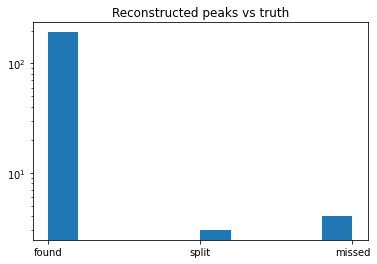

In [16]:
plt.hist(df['outcome'])
plt.yscale('log')
plt.title('Reconstructed peaks vs truth')

For events, we can do something similar

In [17]:
st.data_info('truth_events')

/home/angevaare/software/strax/strax/context.py:392: UserWarning: Option gain_model_nv not taken by any registered plugin
  p = self._get_plugins((data_name,), run_id='0')[data_name]
/home/angevaare/software/strax/strax/context.py:392: UserWarning: Option gain_model_mv not taken by any registered plugin
  p = self._get_plugins((data_name,), run_id='0')[data_name]


,Field name,Data type,Comment
0,time,int64,Start time since unix epoch [ns]
1,endtime,int64,Exclusive end time since unix epoch [ns]
2,start_match,int64,First event number in event datatype within th...
3,end_match,int64,Last (inclusive!) event number in event dataty...
4,outcome,<U32,Outcome of matching to events
5,truth_number,int64,Truth event number


In [18]:
st.show_config('truth_events')

,option,default,current,applies_to,help
0,penalty_s2_by,"((misid_as_s1, -1.0), (split_and_misid, -1.0))",<OMITTED>,"(match_acceptance,)",Add a penalty to the acceptance fraction if th...
1,min_s2_bias_rec,0.85,<OMITTED>,"(match_acceptance,)",If the S2 fraction is greater or equal than th...
2,detector,XENONnT,XENONnT,"(raw_records, raw_records_he, raw_records_aqmo...",
3,event_rate,1000,<OMITTED>,"(raw_records, raw_records_he, raw_records_aqmo...",Average number of events per second
4,chunk_size,100,<OMITTED>,"(raw_records, raw_records_he, raw_records_aqmo...",Duration of each chunk in seconds
...,...,...,...,...,...
67,electron_drift_velocity,"(electron_drift_velocity, ONLINE, True)","(cmt_run_id, 026000, electron_drift_velocity, ...","(events,)",Vertical electron drift velocity in cm/ns (1e4...
68,max_drift_length,148.6515,<OMITTED>,"(events,)",Total length of the TPC from the bottom of gat...
69,min_area_fraction,0.5,<OMITTED>,"(peak_proximity,)",The area of competing peaks must be at least t...
70,nearby_window,10000000,<OMITTED>,"(peak_proximity,)",Peaks starting within this time window (on eit...


In fact we see that we did not do this very intelligently, the random instructions just specified 2 events, each with broad spacing and ~50 peaks/event. As such these two "events" are split into 50 events

In [19]:
df_truth_events = st.get_df(run_id, 'truth_events')
df_truth_events.head()

Loading truth_events: |          | 0.00 % [00:00<?]

,time,endtime,start_match,end_match,outcome,truth_number
0,10000088,990312612,0,49,split,0
1,1010000030,1991797011,50,103,split,1


Now you might want to open each of the events in according to a grouping one had in the truth file. Let's for example open event 0 from the truth file

In [20]:
events = st.get_df(run_id, ('events', 'event_basics'))

/home/angevaare/software/strax/strax/context.py:1067: UserWarning: Option gain_model_nv not taken by any registered plugin
  plugins = self._get_plugins(targets=targets, run_id=run_id)
/home/angevaare/software/strax/strax/context.py:1067: UserWarning: Option gain_model_mv not taken by any registered plugin
  plugins = self._get_plugins(targets=targets, run_id=run_id)
/home/angevaare/software/strax/strax/context.py:723: UserWarning: Option gain_model_nv not taken by any registered plugin
  plugins = self._get_plugins(targets, run_id)
/home/angevaare/software/strax/strax/context.py:723: UserWarning: Option gain_model_mv not taken by any registered plugin
  plugins = self._get_plugins(targets, run_id)


Loading plugins: |          | 0.00 % [00:00<?]

In [21]:
truth_selection = df_truth_events['truth_number'] == 0

In [22]:
event_selection = [
    ((ev['start_match'] <= events['event_number']) & 
     (events['event_number'] <= ev['end_match']))
    for i, ev in
    df_truth_events[truth_selection].iterrows()
]
event_selection = np.any(event_selection, axis=0)

In [23]:
events[event_selection].head()

,time,endtime,n_peaks,drift_time,event_number,s1_index,alt_s1_index,s1_time,alt_s1_time,s1_center_time,...,alt_s2_x_cnn,alt_s2_y_cnn,s2_x_gcn,s2_y_gcn,alt_s2_x_gcn,alt_s2_y_gcn,s2_x_mlp,s2_y_mlp,alt_s2_x_mlp,alt_s2_y_mlp
0,9900000,11992030,2,1728534.0,0,0,-1,10000070,-1,10000138,...,NaN,NaN,-41.069061,20.391129,NaN,NaN,-41.071045,20.506502,NaN,NaN
1,28149942,30861040,2,603464.0,1,0,-1,30000000,-1,30000153,...,NaN,NaN,46.030483,-14.265517,NaN,NaN,46.048023,-14.214386,NaN,NaN
2,48250972,50966950,2,706358.0,2,0,-1,50000010,-1,50000126,...,NaN,NaN,-10.243566,-6.276278,NaN,NaN,-10.291658,-6.336218,NaN,NaN
3,67554272,71761940,2,1499338.0,3,0,-1,70000010,-1,70000140,...,NaN,NaN,-34.923302,-41.573231,NaN,NaN,-35.028625,-41.614471,NaN,NaN
4,89699902,92416210,2,2155314.0,4,0,-1,90000030,-1,90000132,...,NaN,NaN,11.139763,15.966339,NaN,NaN,11.027525,16.074451,NaN,NaN
